## 这次的lab会用到下面这两个包
如果没有安装的同学可以在对应的环境下使用下面的命令安装
```
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple opencv-python
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple scikit-image
```


In [1]:
import cv2
from skimage.transform import radon, iradon

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from Lab4_sol import *

## 复习： 谱图的观察

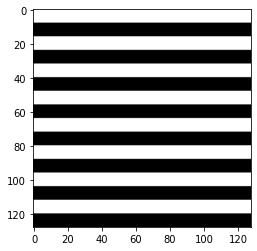

In [3]:
a = np.zeros([16, 128])
a[:8,:] = 1
strip = np.tile(a, (8,1))
plt.imshow(strip, cmap='gray')

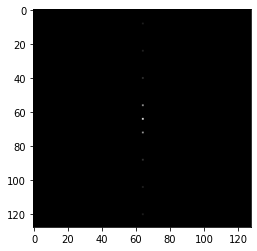

In [4]:
#  %matplotlib inline
spectrum = My_fft2d(strip, True)
plt.imshow((abs(spectrum)), cmap='gray')

注意到点的分布(除中心点外)沿纵向排列，而原图像显然在纵向存在周期性，且周期为16，频率为 1/16 sample/pixel.
其实**不止有两个点**，只是其他点的灰度值相对太小，肉眼没有观察到。我们可以查看哪些位置上的Fourier系数非零

In [5]:
np.where(abs(spectrum[:, 64])>0)

(array([  8,  24,  40,  56,  64,  72,  88, 104, 120], dtype=int64),)

我们也可以具体查看其实部和虚部

(array([  8,  24,  40,  56,  64,  72,  88, 104, 120], dtype=int64),)


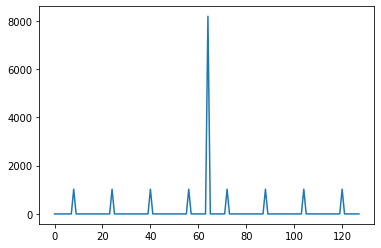

In [6]:
print( np.where(np.real(spectrum[:, 64])!=0) ) # 实部
plt.plot(np.real(spectrum[:, 64]))

(array([  8,  24,  40,  56,  72,  88, 104, 120], dtype=int64),)


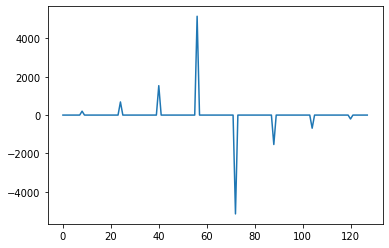

In [7]:
print( np.where(np.imag(spectrum[:, 64])!=0) )
plt.plot(np.imag(spectrum[:, 64]))

我们把原图的条带宽度缩短为原来一半（即周期变一半->8，变化频率变为两倍->1/8）

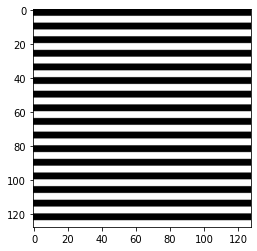

In [8]:
b = np.zeros([8, 128])
b[4:,:] = 1
strip_2 = np.tile(b, (16,1))
plt.imshow(strip_2, cmap='gray')

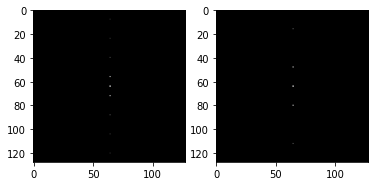

In [9]:
spectrum_2 = My_fft2d(strip_2, True)
plt.subplot(1,2,1)
plt.imshow((abs(spectrum)), cmap='gray')
plt.subplot(1,2,2)
plt.imshow((abs(spectrum_2)), cmap='gray')

从上图可以观察到对比原来，亮点距中心的距离变为原来的两倍。
同样可查看它们的位置如下

In [10]:
print( np.where(np.real(spectrum_2[:, 64])!=0) )

(array([ 16,  48,  64,  80, 112], dtype=int64),)


极端情况，周期是2

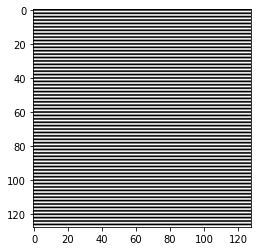

In [11]:
c = np.zeros([2, 128])
c[1:,:] = 1
strip_3 = np.tile(c, (64,1))
plt.imshow(strip_3, cmap='gray')

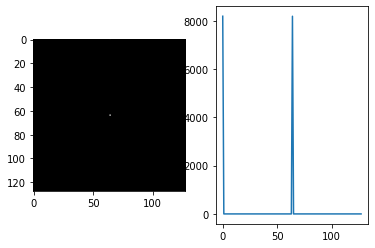

In [12]:
spectrum_3 = My_fft2d(strip_3, True)
plt.subplot(1,2,1)
plt.imshow((abs(spectrum_3)), cmap='gray')
plt.subplot(1,2,2)
plt.plot(abs(spectrum_3[:, 64]))

In [13]:
print( np.where(np.real(spectrum_3[:, 64])!=0) )

(array([ 0, 64], dtype=int64),)


## 总结

图一： 周期为16个像素，图像包含了128/16=8个完整的周期，谱图中亮点与中心的距离依次为：1$\times$8，3$\times$8，5$\times$8，7$\times$8   
图二： 周期为8个像素，图像包含了128/8=16个完整的周期，谱图中亮点与中心的距离依次为：1$\times$16，3$\times$16  
图三： 周期为2个像素，图像包含了128/2=64个完整的周期，谱图中亮点与中心的距离依次为：1$\times$64 

为什么会是奇数倍这样的变化规律？  
离散情况可以手动计算或者写代码（如上）验证不同的M和周期数，
连续情况可以参考[这里](https://mathworld.wolfram.com/FourierSeriesSquareWave.html),注意该例中一个周期的积分是0，所有直流项是0，仅有奇数指标上的Fourier系数不为零。

## 添加噪声

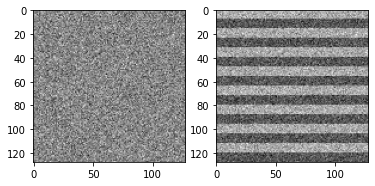

In [14]:
noise_g = np.random.normal(0.5, 0.3, (128,128))
a_polluted = strip + noise_g
plt.subplot(1,2,1)
plt.imshow(noise_g,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(a_polluted,cmap='gray')

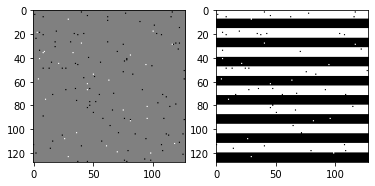

In [15]:
x_loc = np.random.randint(0, 128, 132)
y_loc = np.random.randint(0, 128, 132)
noise_sp = 0.5*np.ones((128, 128))
for x, y in zip(x_loc, y_loc):
    choice = np.random.randint(0,10, 1)
    if choice <= 6:
        strip[x,y] = 0
        noise_sp[x,y] = 0
    else:
        strip[x,y] = 1
        noise_sp[x,y] = 1
plt.subplot(1,2,1)
plt.imshow(noise_sp,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(strip,cmap='gray')

### 本次实验

In [16]:
J = 1j # 定义复数单元
print(J)

1j


In [18]:
np.conjugate(J) # 计算复数共轭

-1j

### 注意有可能出现的数值上的错误
比如 $\frac{\sin(x)}{x}$ 在代入$x=0$ 时

In [19]:
def test(x):
    return np.sin(x)/x

print(test(1e-7))
print(test(0))

0.9999999999999983
nan


C:\Users\17502\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


C:\Users\17502\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


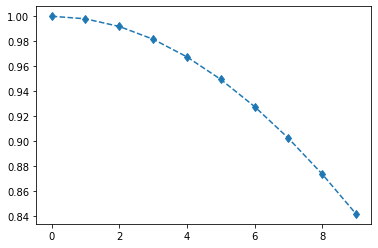

In [20]:
# 使用np.where手动解决
xx = np.linspace(0, 1, 10)
result = test(xx)
result = np.where(np.isnan(result), 1, result)
plt.plot(result, 'd--')

C:\Users\17502\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


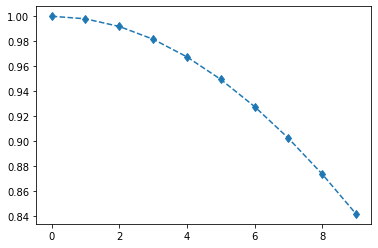

In [21]:
# 另一种解决方式
xx = np.linspace(0, 1, 10)
result = test(xx)
idx = np.where(np.isnan(result))[0] # 找到问题格点
result[idx] = test(xx[idx]+1e-8) # 使用临近值替代。
plt.plot(result, 'd--')

In [22]:
from Lab4_sol import *

#### 如果给定了对应的空间核，如何数值上生成对应的频率滤波函数$H(u,v)$?

假设原图像是128$\times$128大小的，空间滤波核是3 $\times$3 大小

array([[0.+0.39230498j, 0.+0.j        , 0.-0.39230498j],
       [0.-0.39254139j, 0.+0.j        , 0.+0.39254139j],
       [0.+0.39230498j, 0.+0.j        , 0.-0.39230498j]])

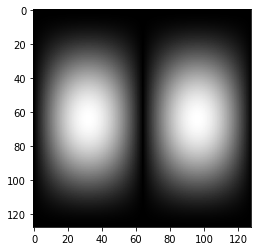

In [23]:
spatial_kernel = np.array([[-1.0,0,1.0],[-2.0,0,2.0],[-1.0,0,1.0]]) # sobel 
padded_spatial_kernel = np.zeros([128,128])
start = 128//2-1
end = start + 3
padded_spatial_kernel[start:end,start:end] = spatial_kernel # 嵌入，形成奇阵列，见P167
freq_kernel = My_fft2d(padded_spatial_kernel,shift=True) # FFT2D
plt.imshow(np.abs(freq_kernel),cmap='gray')
freq_kernel[start:end, start:end]

In [24]:
img_names = ['uniform_noise.tif',  'gaussian_noise.tif', 'saltpep_noise.tif',
             'moving.tif', 
             'donut.tif']
img_list = []
for img_name in img_names:
    temp_img = plt.imread(img_name)
    img_list.append(temp_img)

## 去噪声

In [25]:
# %matplotlib qt

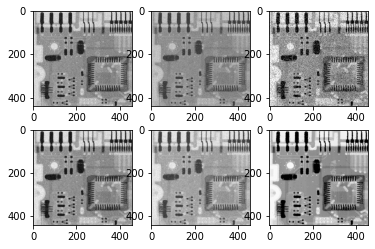

In [26]:
Denoise(img_list[:3])

## 逆滤波

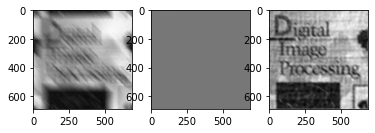

In [27]:
Inverse_filtering(img_list[-2])

## Radon 变换

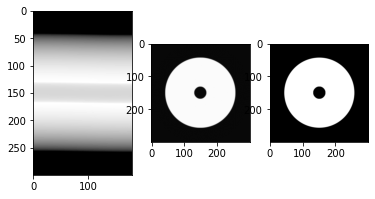

In [28]:
radon_test(img_list[-1])